# Demonstrate the Aggregated Prediction Methods

In [4]:
import helper
import aggregated_predict as ap
import pandas as pd
import joblib
import time
import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'pandas'

## 1. Testing of each model and demonstration of model aggregated prediction methods

Sensor Model 1 Prediction Results:
-----------------------------
Accuracy : 0.9332006193320062
Precision: 0.933248227092186
Recall   : 0.9332006193320062
F1 Score : 0.9332223153449019
-----------------------------

Sensor Model 2 Prediction Results:
-----------------------------
Accuracy : 0.9352650593526506
Precision: 0.9354163882069081
Recall   : 0.9352650593526506
F1 Score : 0.9353237970048786
-----------------------------

Sensor Model 3 Prediction Results:
-----------------------------
Accuracy : 0.9337904593379046
Precision: 0.9338068733559393
Recall   : 0.9337904593379046
F1 Score : 0.9337983825477744
-----------------------------

Network Model Prediction Results:
-----------------------------
Accuracy : 0.9976160633094939
Precision: 0.9976166139908739
Recall   : 0.9976160633094939
F1 Score : 0.9976162320784713
-----------------------------


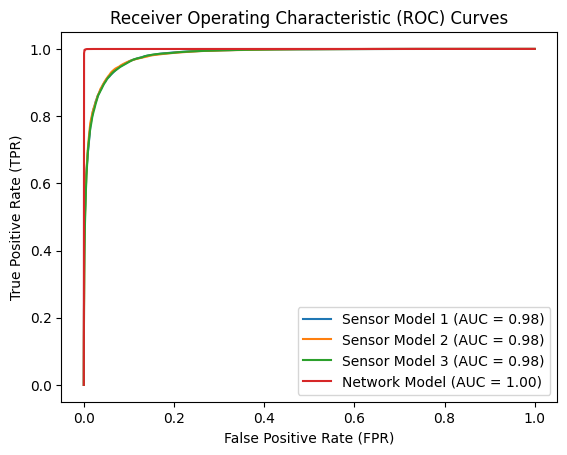

In [ ]:
# Load the testing set
sensor_test, network_test = helper.load_test_set()

# Load the models
sensor_models = ['./received_models/client_1.joblib', './received_models/client_2.joblib', './received_models/client_3.joblib']
network_model = './received_models/global_model.joblib'

# Test models 
models_predictions, models_metrics = ap.get_predictions_and_metrics(
    local_models=sensor_models,
    sensor_test=sensor_test,
    global_model=network_model,
    network_test=network_test,
)

In [ ]:
# Load network testing set, set the weights
y_test = network_test.iloc[:, -1]
model_weights = [0.2, 0.2, 0.2, 0.4]

In [ ]:
print(f"Aggregated Prediction by Score:")
score = ap.aggregate_predict_by_score(
    models_predictions=models_predictions,
    models_metrics=models_metrics,
    models_weights=model_weights)
helper.get_metrics(y_test, score, printout=True)

Aggregated Prediction by Score:
-----------------------------
Accuracy : 0.9864828331981617
Precision: 0.9865017908018493
Recall   : 0.9864828331981617
F1 Score : 0.9864885274716239
-----------------------------


(0.9864828331981617,
 0.9865017908018493,
 0.9864828331981617,
 0.9864885274716239)

In [ ]:
print(f"Aggregated Prediction by Vote:")
vote = ap.aggregate_predict_by_vote(models_predictions=models_predictions)
helper.get_metrics(y_test, vote, printout=True)

Aggregated Prediction by Vote:
-----------------------------
Accuracy : 0.9315785593157856
Precision: 0.9416891828323491
Recall   : 0.9315785593157856
F1 Score : 0.9322644905430547
-----------------------------



(0.9315785593157856,
 0.9416891828323491,
 0.9315785593157856,
 0.9322644905430547)

## 2. Simulation of Intrusion Detection in Wireless Sensor Networks

Once the WSN simulation starts, the sensors in the nodes will collect new sensing data, these data need to pass the validation of the local models first. The data that passes the validation will be sent to the server and the data that does not pass will be discarded. Once the server receives the sensed data, it will validate the sensor data and the network traffic generated by the transmitted data by aggregated prediction method to give the final validation result. If the data passes the validation, the data is saved, otherwise, the data is discarded.

In [ ]:
sensor_test['target'].value_counts()

target
0    24657
1    16032
Name: count, dtype: int64

In [ ]:
# Select 10000 equally distributed samples from the testing set
s0 = sensor_test[sensor_test['target'] == 0].sample(10000)
s1 = sensor_test[sensor_test['target'] == 1].sample(10000)
sampled_sensor_data = pd.concat([s0, s1])
sampled_network_data = network_test.loc[sampled_sensor_data.index]

sampled_sensor_data = sampled_sensor_data.reset_index(drop=True)
sampled_network_data = sampled_network_data.reset_index(drop=True)

print(sampled_sensor_data['target'].value_counts())
print(sampled_network_data['target'].value_counts())

target
0    10000
1    10000
Name: count, dtype: int64
target
0    10000
1    10000
Name: count, dtype: int64


In [ ]:
# Use Client 1 as an example
client_1_model = joblib.load('./received_models/client_1.joblib')
test_X = sampled_sensor_data.iloc[:, :-1]
test_y = sampled_sensor_data.iloc[:, -1]
client_1_predict = client_1_model.predict(test_X)
helper.get_metrics(test_y, client_1_predict, printout=True)

-----------------------------
Accuracy : 0.93015
Precision: 0.9304432222274136
Recall   : 0.93015
F1 Score : 0.9301381023441745
-----------------------------


(0.93015, 0.9304432222274136, 0.93015, 0.9301381023441745)

In [ ]:
client_1_predict_df = pd.DataFrame(client_1_predict, columns=['Pred'])
client_1_predict_df['Pred'].value_counts()

Pred
0    10261
1     9739
Name: count, dtype: int64

In [ ]:
# Client 1 will test the sensor data locally, only those that pass will be sent to the server
# Drop false data, target = 1
rows_to_keep = client_1_predict_df['Pred'] == 0
filtered_sensor_data = sampled_sensor_data[rows_to_keep]
filtered_network_data = sampled_network_data[rows_to_keep]

print(filtered_sensor_data['target'].value_counts())
print(filtered_network_data['target'].value_counts())

target
0    9432
1     829
Name: count, dtype: int64
target
0    9432
1     829
Name: count, dtype: int64


Sensor Model 1 Prediction Results:
-----------------------------
Accuracy : 0.919208654127278
Precision: 0.8449445498224819
Recall   : 0.919208654127278
F1 Score : 0.8805134845608579
-----------------------------

Sensor Model 2 Prediction Results:
-----------------------------
Accuracy : 0.9423058181463795
Precision: 0.9433430101672322
Recall   : 0.9423058181463795
F1 Score : 0.9428030172562087
-----------------------------

Sensor Model 3 Prediction Results:
-----------------------------
Accuracy : 0.941721079816782
Precision: 0.9425686736264228
Recall   : 0.941721079816782
F1 Score : 0.9421307585073342
-----------------------------

Network Model Prediction Results:
-----------------------------
Accuracy : 0.9975635902933437
Precision: 0.9976185335183227
Recall   : 0.9975635902933437
F1 Score : 0.9975774692679684
-----------------------------


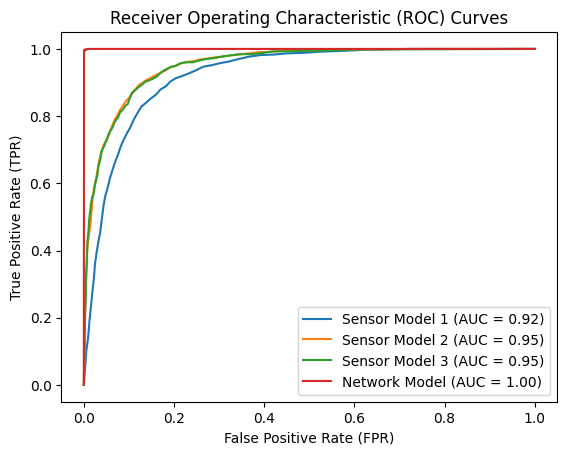

In [ ]:
# Test Client 1 data using all models
new_models_predictions, new_models_metrics = ap.get_predictions_and_metrics(
    local_models=sensor_models,
    sensor_test=filtered_sensor_data,
    global_model=network_model,
    network_test=filtered_network_data,
)

In [ ]:
# Load Client 1 network testing set, set the weights
new_y_test = filtered_network_data.iloc[:, -1]
new_model_weights = [0.4, 0.05, 0.05, 0.5]

In [ ]:
print(f"Client 1 Aggregated Prediction by Score:")
start_time = time.time()

new_score = ap.aggregate_predict_by_score(
    models_predictions=new_models_predictions,
    models_metrics=new_models_metrics,
    models_weights=new_model_weights)

end_time = time.time()
rows = len(new_models_predictions[0])
time_spend = end_time - start_time

helper.get_metrics(new_y_test, new_score, printout=True)
print(f"Time spent predicting {rows} pieces of data: {time_spend} second, average time spent: {time_spend / rows} seconds.")

Client 1 Aggregated Prediction by Score:
-----------------------------
Accuracy : 0.9975635902933437
Precision: 0.9976185335183227
Recall   : 0.9975635902933437
F1 Score : 0.9975774692679684
-----------------------------


Time spent predicting 10261 pieces of data: 0.0009970664978027344 second, average time spent: 9.717049973713423e-08 seconds.


In [ ]:
print(f"Client 1 Aggregated Prediction by Vote:")
start_time = time.time()

new_vote = ap.aggregate_predict_by_vote(models_predictions=new_models_predictions)

end_time = time.time()
time_spend = end_time - start_time

helper.get_metrics(new_y_test, new_vote, printout=True)
print(f"Time spent predicting {rows} pieces of data: {time_spend} second, average time spent: {time_spend / rows} seconds.")

Client 1 Aggregated Prediction by Vote:
-----------------------------
Accuracy : 0.9458142481239645
Precision: 0.9675667954474848
Recall   : 0.9458142481239645
F1 Score : 0.9517952698031112
-----------------------------


Time spent predicting 10261 pieces of data: 0.006998300552368164 second, average time spent: 6.820290958355096e-07 seconds.
